# License Stuff
```
Copyright 2021 Thierry Lincoln

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.```

# Introduction to preprocessing with pandas

When I ask a pythonners to read a csv file they will often do it with the raw csv library : 


``` python 
import csv

with open('file.csv', 'r') as file:
    my_reader = csv.reader(file, delimiter=',')
    for row in my_reader:
        print(row)`

```

This isn't necessarily bad but for any data preprocessing further down the line it is going to be rather complex.

In Data Analysis or Data Science most people use the following library to read and process datasets

In [47]:
import pandas as pd

Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. Released in 2008

#### Interesting facts: 

Pandas is based on NumPy ( another famous python library ) but not 100%.

Examples:

   * Matrix operations are based on NumPy logic (since that library implements efficient and fast Cython code for performing matrix algebra operations. )
   * Data structures in Pandas are Pandas specific and not based on NumPy

### In practice 

Let's try to open the Titanic passenger dataset (name, age, price of ticket, etc.) to make some Data Analysis. 

In [48]:
df  = pd.read_csv('../Datasets/titanic.csv')

In [49]:
# lets preview our dataframe using df.head()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Some Data Cleaning / Preprocessing

In [50]:
# we are GDPRD / DPA conscious, thus we may want to drop that name column, we don't need to gossip on who died...
# here is how to do it
df = df.drop('Name',axis=1)

In [51]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# to select one column or multiple columns we can perform as follow:

df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [19]:
# not that using loc render the same results
df.loc[:,'Survived'].head() 

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [16]:
df[['Survived', 'Sex']].head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


In [21]:
# say we are only interested with young peoples

df[df['Age']<24].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [23]:
# say we don't like those spaces in the ticket number how we can remove that ? 

#first let's create a function which takes a string and then return the string without spaces

def trim_spaces(string):
    
    if type(string)!=str:
        raise Exception(f"Proposed varaible :  {string} is of type {type(string)} instead of str string")
    
    return string.replace(" ", "")



# second lets apply that manipulation to the column Ticket

df['Ticket'].apply(lambda x: trim_spaces(x)).head()
    

0           A/521171
1            PC17599
2    STON/O2.3101282
3             113803
4             373450
Name: Ticket, dtype: object

## Some Data Analysis

In [33]:
# this is an handy way to statiscally describe your dataset with one command
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
#lets say I want to get those statistics female vs male

df.groupby(['Survived','Sex'])['Age'].describe()

count       mean        std   min    25%   50%    75%   max
Survived Sex                                                                
0        female   64.0  25.046875  13.618591  2.00  16.75  24.5  33.25  57.0
         male    360.0  31.618056  14.056019  1.00  21.75  29.0  39.25  74.0
1        female  197.0  28.847716  14.175073  0.75  19.00  28.0  38.00  63.0
         male     93.0  27.276022  16.504803  0.42  18.00  28.0  36.00  80.0

In [ ]:
df.groupby('Sex').describe()

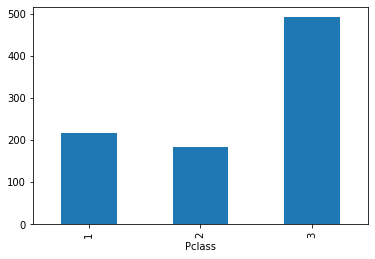

In [43]:
df.groupby('Pclass')['Survived'].count().plot.bar()

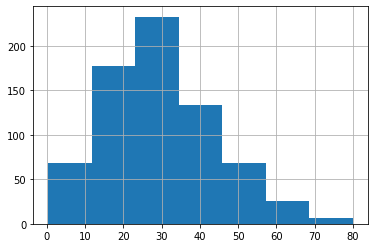

In [45]:
df.Age.hist(bins=7)

# More advance problems ( Memory )

When you receive a message like this from one of your best friends, what do you do ? 
<img src="./images/memory_error.png" />

If you are going to work in a Big Data context, you may need to open large files. Several strategies can be implemented to handle that.

### Using python generators

if you are not familiar with generators ``` yield syntax```  checkout : https://realpython.com/introduction-to-python-generators/

> This method is useful when training machien learning models since they often rely on a concept of "Batch size" for training, thus the data can be passed to the model by chunksize.

In [31]:
df2  = pd.read_csv('../Datasets/titanic.csv',chunksize=3)

for dataframe in df2:
    print(dataframe.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
   PassengerId  Survived  Pclass  \
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. W

     PassengerId  Survived  Pclass                               Name     Sex  \
117          118         0       2    Turpin, Mr. William John Robert    male   
118          119         0       1           Baxter, Mr. Quigg Edmond    male   
119          120         0       3  Andersson, Miss. Ellis Anna Maria  female   

     Age  SibSp  Parch    Ticket      Fare    Cabin Embarked  
117   29      1      0     11668   21.0000      NaN        S  
118   24      0      1  PC 17558  247.5208  B58 B60        C  
119    2      4      2    347082   31.2750      NaN        S  
     PassengerId  Survived  Pclass                         Name   Sex   Age  \
120          121         0       2  Hickman, Mr. Stanley George  male  21.0   
121          122         0       3   Moore, Mr. Leonard Charles  male   NaN   
122          123         0       2         Nasser, Mr. Nicholas  male  32.5   

     SibSp  Parch        Ticket     Fare  Cabin Embarked  
120      2      0  S.O.C. 14879  73.5000    NaN

     PassengerId  Survived  Pclass                             Name     Sex  \
240          241         0       3            Zabour, Miss. Thamine  female   
241          242         1       3   Murphy, Miss. Katherine "Kate"  female   
242          243         0       2  Coleridge, Mr. Reginald Charles    male   

      Age  SibSp  Parch       Ticket     Fare  Cabin Embarked  
240   NaN      1      0         2665  14.4542    NaN        C  
241   NaN      1      0       367230  15.5000    NaN        Q  
242  29.0      0      0  W./C. 14263  10.5000    NaN        S  
     PassengerId  Survived  Pclass                           Name   Sex  Age  \
243          244         0       3  Maenpaa, Mr. Matti Alexanteri  male   22   
244          245         0       3           Attalah, Mr. Sleiman  male   30   
245          246         0       1    Minahan, Dr. William Edward  male   44   

     SibSp  Parch             Ticket    Fare Cabin Embarked  
243      0      0  STON/O 2. 3101275   7.125

     PassengerId  Survived  Pclass                               Name     Sex  \
357          358         0       2          Funk, Miss. Annie Clemmer  female   
358          359         1       3               McGovern, Miss. Mary  female   
359          360         1       3  Mockler, Miss. Helen Mary "Ellie"  female   

      Age  SibSp  Parch  Ticket     Fare  Cabin Embarked  
357  38.0      0      0  237671  13.0000    NaN        S  
358   NaN      0      0  330931   7.8792    NaN        Q  
359   NaN      0      0  330980   7.8792    NaN        Q  
     PassengerId  Survived  Pclass                             Name     Sex  \
360          361         0       3               Skoog, Mr. Wilhelm    male   
361          362         0       2        del Carlo, Mr. Sebastiano    male   
362          363         0       3  Barbara, Mrs. (Catherine David)  female   

     Age  SibSp  Parch         Ticket     Fare  Cabin Embarked  
360   40      1      4         347088  27.9000    NaN    

     PassengerId  Survived  Pclass                       Name     Sex  Age  \
477          478         0       3  Braund, Mr. Lewis Richard    male   29   
478          479         0       3  Karlsson, Mr. Nils August    male   22   
479          480         1       3   Hirvonen, Miss. Hildur E  female    2   

     SibSp  Parch   Ticket     Fare  Cabin Embarked  
477      1      0     3460   7.0458    NaN        S  
478      0      0   350060   7.5208    NaN        S  
479      0      1  3101298  12.2875    NaN        S  
     PassengerId  Survived  Pclass                              Name   Sex  \
480          481         0       3    Goodwin, Master. Harold Victor  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
482          483         0       3          Rouse, Mr. Richard Henry  male   

      Age  SibSp  Parch    Ticket   Fare  Cabin Embarked  
480   9.0      5      2   CA 2144  46.90    NaN        S  
481   NaN      0      0    239854   0.00

     PassengerId  Survived  Pclass                         Name     Sex   Age  \
594          595         0       2      Chapman, Mr. John Henry    male  37.0   
595          596         0       3  Van Impe, Mr. Jean Baptiste    male  36.0   
596          597         1       2   Leitch, Miss. Jessie Wills  female   NaN   

     SibSp  Parch       Ticket   Fare  Cabin Embarked  
594      1      0  SC/AH 29037  26.00    NaN        S  
595      1      1       345773  24.15    NaN        S  
596      0      0       248727  33.00    NaN        S  
     PassengerId  Survived  Pclass  \
597          598         0       3   
598          599         0       3   
599          600         1       1   

                                             Name   Sex   Age  SibSp  Parch  \
597                           Johnson, Mr. Alfred  male  49.0      0      0   
598                             Boulos, Mr. Hanna  male   NaN      0      0   
599  Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")  male  49.0

     PassengerId  Survived  Pclass                               Name     Sex  \
720          721         1       2  Harper, Miss. Annie Jessie "Nina"  female   
721          722         0       3          Jensen, Mr. Svend Lauritz    male   
722          723         0       2       Gillespie, Mr. William Henry    male   

     Age  SibSp  Parch  Ticket     Fare  Cabin Embarked  
720    6      0      1  248727  33.0000    NaN        S  
721   17      1      0  350048   7.0542    NaN        S  
722   34      0      0   12233  13.0000    NaN        S  
     PassengerId  Survived  Pclass                           Name   Sex  Age  \
723          724         0       2        Hodges, Mr. Henry Price  male   50   
724          725         1       1  Chambers, Mr. Norman Campbell  male   27   
725          726         0       3            Oreskovic, Mr. Luka  male   20   

     SibSp  Parch  Ticket     Fare Cabin Embarked  
723      0      0  250643  13.0000   NaN        S  
724      1      0 

     PassengerId  Survived  Pclass                        Name   Sex   Age  \
843          844         0       3  Lemberopolous, Mr. Peter L  male  34.5   
844          845         0       3         Culumovic, Mr. Jeso  male  17.0   
845          846         0       3         Abbing, Mr. Anthony  male  42.0   

     SibSp  Parch     Ticket    Fare  Cabin Embarked  
843      0      0       2683  6.4375    NaN        C  
844      0      0     315090  8.6625    NaN        S  
845      0      0  C.A. 5547  7.5500    NaN        S  
     PassengerId  Survived  Pclass                      Name   Sex   Age  \
846          847         0       3  Sage, Mr. Douglas Bullen  male   NaN   
847          848         0       3        Markoff, Mr. Marin  male  35.0   
848          849         0       2         Harper, Rev. John  male  28.0   

     SibSp  Parch    Ticket     Fare  Cabin Embarked  
846      8      2  CA. 2343  69.5500    NaN        S  
847      0      0    349213   7.8958    NaN        C

### Using Dask
A Dask DataFrame is a large parallel DataFrame composed of many smaller Pandas DataFrames, split along the index. These Pandas DataFrames may live on disk for larger-than-memory computing on a single machine, or on many different machines in a cluster.

https://docs.dask.org/en/

In [25]:
!pip3 install dask

     |████████████████████████████████| 941 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 108 kB 14.3 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 2.5 MB/s eta 0:00:011


In [26]:
import dask
import dask.dataframe as dd
dfd = dd.read_csv('../Datasets/titanic.csv')

In [27]:
#everything works the same (almost) but now the dataset can be distributed
dfd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
